# Stroke prediction
## P2: EDA

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
corrtable = df.corr()
corrtable

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

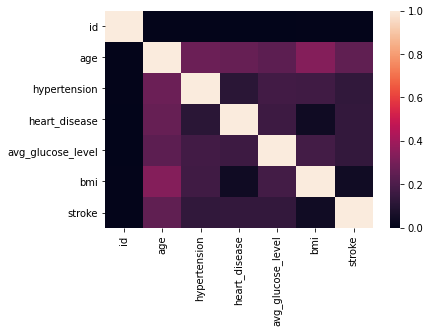

In [16]:
sns.heatmap(corrtable)

## heart disease and stroke

In [17]:
cross_tab_heart_disease = pd.crosstab(df['heart_disease'],df['stroke'])
cross_tab_heart_disease

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


<AxesSubplot:xlabel='heart_disease'>

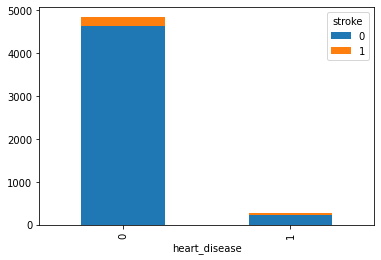

In [18]:
cross_tab_heart_disease.plot(kind='bar',stacked = True)

<AxesSubplot:xlabel='heart_disease'>

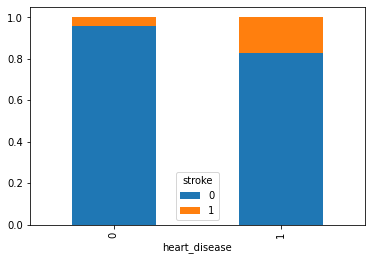

In [19]:
cross_tab_heart_disease_norm = cross_tab_heart_disease.div(cross_tab_heart_disease.sum(1),axis=0)
cross_tab_heart_disease_norm.plot(kind='bar',stacked = True)

## smoking_state and stroke

In [20]:
cross_tab_smoking = pd.crosstab(df['smoking_status'],df['stroke'])
cross_tab_smoking

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


<AxesSubplot:xlabel='smoking_status'>

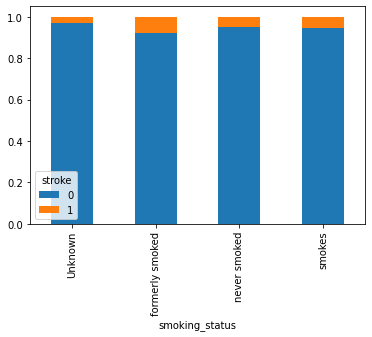

In [21]:
cross_tab_smoking_norm = cross_tab_smoking.div(cross_tab_smoking.sum(1),axis=0)
cross_tab_smoking_norm.plot(kind='bar',stacked = True)

## gender and stroke

In [22]:
cross_tab_gender = pd.crosstab(df['stroke'],df['gender'])
cross_tab_gender

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


In [23]:
round(cross_tab_gender.div(cross_tab_gender.sum(0),axis=1)*100,1)

gender,Female,Male,Other
stroke,,,
0,95.3,94.9,100.0
1,4.7,5.1,0.0


## age and stroke (overlay)

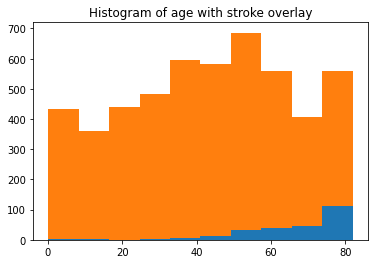

In [24]:
import matplotlib.pyplot as plt
age_1=df[df.stroke==1]["age"]
age_0=df[df.stroke==0]["age"]
plt.hist([age_1,age_0],bins=10,stacked=True)
plt.title('Histogram of age with stroke overlay')
#plt.xlable('Age')
#plt.ylable('Frequency')
plt.show()